# Machine Learning for Regression

In [120]:
import pandas as pd
import numpy as np
import kagglehub
import os
import matplotlib.pyplot as plt
import seaborn as sns

Data Preparation

In [121]:
car_df = pd.read_csv('../dataset/cardataset.csv')

In [122]:
car_df.columns = car_df.columns.str.lower().str.strip().str.replace(' ', '_')

In [123]:
car_df.head()

,make,model,year,engine_fuel_type,engine_hp,engine_cylinders,transmission_type,driven_wheels,number_of_doors,market_category,vehicle_size,vehicle_style,highway_mpg,city_mpg,popularity,msrp
0,BMW,1 Series M,2011,premium unleaded (required),335.0,6.0,MANUAL,rear wheel drive,2.0,"Factory Tuner,Luxury,High-Performance",Compact,Coupe,26,19,3916,46135
1,BMW,1 Series,2011,premium unleaded (required),300.0,6.0,MANUAL,rear wheel drive,2.0,"Luxury,Performance",Compact,Convertible,28,19,3916,40650
2,BMW,1 Series,2011,premium unleaded (required),300.0,6.0,MANUAL,rear wheel drive,2.0,"Luxury,High-Performance",Compact,Coupe,28,20,3916,36350
3,BMW,1 Series,2011,premium unleaded (required),230.0,6.0,MANUAL,rear wheel drive,2.0,"Luxury,Performance",Compact,Coupe,28,18,3916,29450
4,BMW,1 Series,2011,premium unleaded (required),230.0,6.0,MANUAL,rear wheel drive,2.0,Luxury,Compact,Convertible,28,18,3916,34500


In [124]:
car_df = car_df.apply(lambda x: x.str.lower().str.strip().str.replace(' ', '_') if x.dtype == 'object' else x)

In [125]:
car_df.head()

,make,model,year,engine_fuel_type,engine_hp,engine_cylinders,transmission_type,driven_wheels,number_of_doors,market_category,vehicle_size,vehicle_style,highway_mpg,city_mpg,popularity,msrp
0,bmw,1_series_m,2011,premium_unleaded_(required),335.0,6.0,manual,rear_wheel_drive,2.0,"factory_tuner,luxury,high-performance",compact,coupe,26,19,3916,46135
1,bmw,1_series,2011,premium_unleaded_(required),300.0,6.0,manual,rear_wheel_drive,2.0,"luxury,performance",compact,convertible,28,19,3916,40650
2,bmw,1_series,2011,premium_unleaded_(required),300.0,6.0,manual,rear_wheel_drive,2.0,"luxury,high-performance",compact,coupe,28,20,3916,36350
3,bmw,1_series,2011,premium_unleaded_(required),230.0,6.0,manual,rear_wheel_drive,2.0,"luxury,performance",compact,coupe,28,18,3916,29450
4,bmw,1_series,2011,premium_unleaded_(required),230.0,6.0,manual,rear_wheel_drive,2.0,luxury,compact,convertible,28,18,3916,34500


Exploratory Data Analysis

In [126]:
for col in car_df.columns:
    print(col)
    print(car_df[col].unique()[:5])
    print(car_df[col].nunique())
    print('\n')


make
['bmw' 'audi' 'fiat' 'mercedes-benz' 'chrysler']
48


model
['1_series_m' '1_series' '100' '124_spider' '190-class']
914


year
[2011 2012 2013 1992 1993]
28


engine_fuel_type
['premium_unleaded_(required)' 'regular_unleaded'
 'premium_unleaded_(recommended)' 'flex-fuel_(unleaded/e85)' 'diesel']
10


engine_hp
[335. 300. 230. 320. 172.]
356


engine_cylinders
[ 6.  4.  5.  8. 12.]
9


transmission_type
['manual' 'automatic' 'automated_manual' 'direct_drive' 'unknown']
5


driven_wheels
['rear_wheel_drive' 'front_wheel_drive' 'all_wheel_drive'
 'four_wheel_drive']
4


number_of_doors
[ 2.  4.  3. nan]
3


market_category
['factory_tuner,luxury,high-performance' 'luxury,performance'
 'luxury,high-performance' 'luxury' 'performance']
71


vehicle_size
['compact' 'midsize' 'large']
3


vehicle_style
['coupe' 'convertible' 'sedan' 'wagon' '4dr_hatchback']
16


highway_mpg
[26 28 27 25 24]
59


city_mpg
[19 20 18 17 16]
69


popularity
[3916 3105  819  617 1013]
48


msrp
[46135 40650 

<Axes: xlabel='msrp', ylabel='Count'>

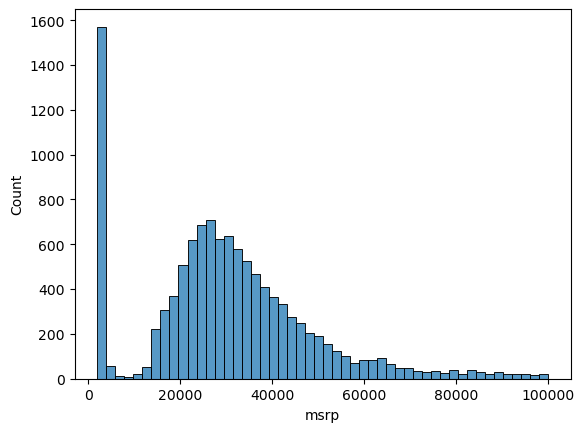

In [127]:
sns.histplot(car_df.msrp[car_df.msrp < 100000], bins=50)

In [128]:
msrp_logs = np.log1p(car_df['msrp'])

<Axes: xlabel='msrp', ylabel='Count'>

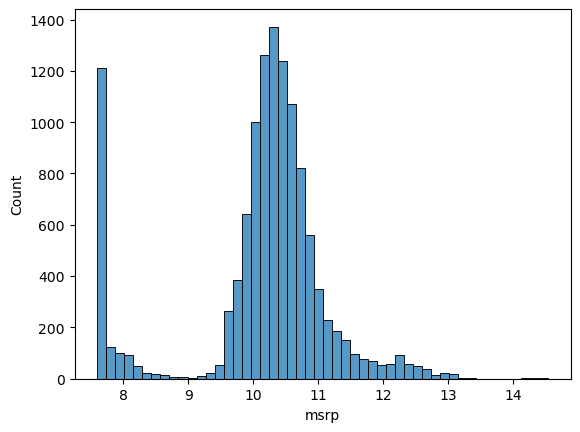

In [129]:
sns.histplot(msrp_logs, bins=50)

In [130]:
car_df.isnull().sum()

make                    0
model                   0
year                    0
engine_fuel_type        3
engine_hp              69
engine_cylinders       30
transmission_type       0
driven_wheels           0
number_of_doors         6
market_category      3742
vehicle_size            0
vehicle_style           0
highway_mpg             0
city_mpg                0
popularity              0
msrp                    0
dtype: int64

Setting up Validation Framework

In [131]:
n = car_df.shape[0]

n_val = int(n * 0.2)
n_test = int(n * 0.2)
n_train = n - (n_val + n_test)

In [132]:
n_val, n_test, n_train

(2382, 2382, 7150)

In [133]:
idx = np.arange(n)
np.random.seed(2)
np.random.shuffle(idx)

In [134]:
df_train = car_df.iloc[idx[: n_train]].reset_index(drop=True)
df_test = car_df.iloc[idx[n_train : n_train + n_test]].reset_index(drop=True)
df_val = car_df.iloc[idx[n_train + n_test :]].reset_index(drop=True)

In [135]:
y_train = np.log1p(df_train.msrp.values)
y_test = np.log1p(df_test.msrp.values)
y_val = np.log1p(df_val.msrp.values)

In [136]:
del df_train['msrp']
del df_test['msrp']
del df_val['msrp']

Linear Regression

In [137]:
car_df.iloc[5]

make                                         bmw
model                                   1_series
year                                        2012
engine_fuel_type     premium_unleaded_(required)
engine_hp                                  230.0
engine_cylinders                             6.0
transmission_type                         manual
driven_wheels                   rear_wheel_drive
number_of_doors                              2.0
market_category               luxury,performance
vehicle_size                             compact
vehicle_style                              coupe
highway_mpg                                   28
city_mpg                                      18
popularity                                  3916
msrp                                       31200
Name: 5, dtype: object

In [138]:
Xi = [230, 18, 3916]

In [139]:
w0 = 7.17

w = [0.01, 0.04, 0.002]

In [140]:
def linear_regression(Xi):

    """
    Predict price with Linear Regression

    Args:
        xi (list or array): input features
        w (list or array): weights corresponding to the features
        w0 (float): bias or intercept term

    Returns:
        float: predicted value
    """

    assert len(Xi) == len(w)

    return w0 + sum(w[i] * Xi[i] for i in range(len(Xi)))

In [141]:
linear_regression(Xi)

18.022

In [142]:
np.expm1(linear_regression(Xi))

np.float64(67120494.33915682)

Linear Regression Vector From

In [143]:
def dot(Xi, w):

    assert len(Xi) == len(w)

    return sum([w[i] * Xi[i] for i in range(len(Xi))])

In [144]:
w_new = [w0] + w

In [145]:
def linear_regression_vector(Xi):

    assert len(Xi) == len(w)

    Xi = [1] + Xi

    return dot(Xi, w_new)

In [146]:
print(linear_regression(Xi), linear_regression_vector(Xi))

18.022 18.022


In [147]:
Xi = [453, 11, 86]

w0 = 7.17

w = [0.01, 0.04, 0.002]

In [148]:
X1 = [1, 453, 24, 1043]

X2 = [1, 378, 56, 2067]

X3 = [1, 298, 32, 3054]

X = [X1, X2, X3]

X = np.array(X)

In [149]:
X.dot(w_new)

array([14.746, 17.324, 17.538])

Training a Linear Regression Model

In [150]:
X = [
    [453, 24, 1043],
    [378, 56, 2067],
    [298, 32, 3054],
    [353, 24, 1043],
    [178, 56, 2067],
    [798, 32, 3054],
    [253, 24, 1043],
    [162, 56, 2067],
    [298, 32, 3054]
]

X = np.array(X)

In [151]:
y = [545, 343, 322, 544, 322, 443, 66, 744, 646]

In [152]:
def train_linear_regression(X, y):

    ones = np.ones(X.shape[0])

    X = np.column_stack([ones, X])

    XTX = X.T.dot(X)

    XTX_inv = np.linalg.inv(XTX)
    
    w_full = XTX_inv.dot(X.T).dot(y)

    return w_full[0], w_full[1:]


In [153]:
train_linear_regression(X, y)

(np.float64(302.737306366527), array([0.02091784, 1.60357362, 0.03489255]))

Car price baseline model

In [154]:
df_train.head()

,make,model,year,engine_fuel_type,engine_hp,engine_cylinders,transmission_type,driven_wheels,number_of_doors,market_category,vehicle_size,vehicle_style,highway_mpg,city_mpg,popularity
0,chevrolet,cobalt,2008,regular_unleaded,148.0,4.0,manual,front_wheel_drive,2.0,NaN,compact,coupe,33,24,1385
1,toyota,matrix,2012,regular_unleaded,132.0,4.0,automatic,front_wheel_drive,4.0,hatchback,compact,4dr_hatchback,32,25,2031
2,subaru,impreza,2016,regular_unleaded,148.0,4.0,automatic,all_wheel_drive,4.0,hatchback,compact,4dr_hatchback,37,28,640
3,volkswagen,vanagon,1991,regular_unleaded,90.0,4.0,manual,rear_wheel_drive,3.0,NaN,large,passenger_minivan,18,16,873
4,ford,f-150,2017,flex-fuel_(unleaded/e85),385.0,8.0,automatic,four_wheel_drive,4.0,flex_fuel,large,crew_cab_pickup,21,15,5657


In [155]:
df_train.dtypes

make                  object
model                 object
year                   int64
engine_fuel_type      object
engine_hp            float64
engine_cylinders     float64
transmission_type     object
driven_wheels         object
number_of_doors      float64
market_category       object
vehicle_size          object
vehicle_style         object
highway_mpg            int64
city_mpg               int64
popularity             int64
dtype: object

In [156]:
df_train.columns

Index(['make', 'model', 'year', 'engine_fuel_type', 'engine_hp',
       'engine_cylinders', 'transmission_type', 'driven_wheels',
       'number_of_doors', 'market_category', 'vehicle_size', 'vehicle_style',
       'highway_mpg', 'city_mpg', 'popularity'],
      dtype='object')

In [157]:
base = ['engine_hp', 'engine_cylinders', 'highway_mpg',
        'city_mpg', 'popularity']
    
X_train = df_train[base]

X_train.fillna(0, inplace=True)

w0, w = train_linear_regression(X_train, y_train)

y_pred = w0 + X_train.dot(w)

C:\Users\GD-VILLANUEVA\AppData\Local\Temp\ipykernel_15160\4190955986.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_train.fillna(0, inplace=True)


In [158]:
X_train.isna().sum()

engine_hp           0
engine_cylinders    0
highway_mpg         0
city_mpg            0
popularity          0
dtype: int64

<Axes: ylabel='Count'>

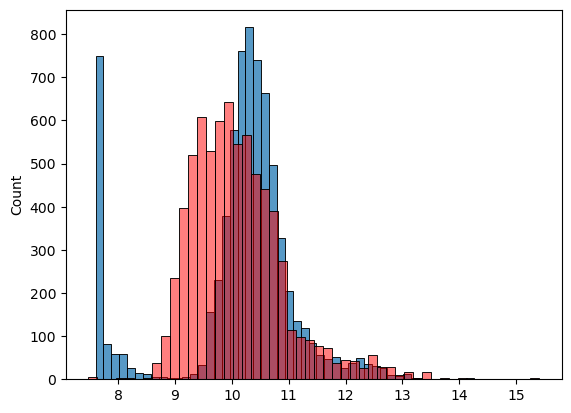

In [159]:
sns.histplot((y_train), bins=50)
sns.histplot((y_pred), color='red', bins=50, alpha=0.5)

RMSE

In [160]:
def rmse(y, y_pred):

    se = (y - y_pred) ** 2

    mse = se.mean()

    return np.sqrt(mse)

In [161]:
rmse(y_train, y_pred)

np.float64(0.7554192603920132)

Validating the Model

In [162]:
def prepare_x(df):

    df_num = df[base]
    
    df_num.fillna(0).values

    X = df_num.fillna(0).values

    return X

In [ ]:
X_train = prepare_x(df_train)

w0, w = train_linear_regression(X_train, y_train)

X_val = prepare_x(df_val)

y_pred = w0 + X_val.dot(w)

In [164]:
rmse(y_val, y_pred)

np.float64(0.7359130757318728)

Simple Feature Engineering

In [165]:
def prepare_x(df):

    df = df.copy()

    df['age'] = 2017 - df.year

    features = base + ['age']

    df_num = df[features]
    df_num.fillna(0).values
    X = df_num.fillna(0).values

    return X

In [166]:
X_train = prepare_x(df_train)

X_val = prepare_x(df_val)

w0, w = train_linear_regression(X_train, y_train)

y_pred = w0 + X_val.dot(w)

y_val

rmse(y_val, y_pred)

np.float64(0.5149229218585324)

<Axes: ylabel='Count'>

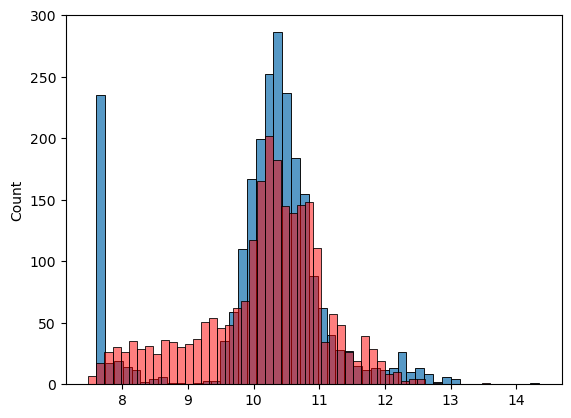

In [167]:
sns.histplot((y_val), bins=50)
sns.histplot((y_pred), color='red', bins=50, alpha=0.5)

Categorical Values

In [168]:
for v in [2, 3, 4]:
    df_train['num_doors_%s' % v] = (df_train.number_of_doors == v).astype(int)

In [169]:
df_train

,make,model,year,engine_fuel_type,engine_hp,engine_cylinders,transmission_type,driven_wheels,number_of_doors,market_category,vehicle_size,vehicle_style,highway_mpg,city_mpg,popularity,num_doors_2,num_doors_3,num_doors_4
0,chevrolet,cobalt,2008,regular_unleaded,148.0,4.0,manual,front_wheel_drive,2.0,NaN,compact,coupe,33,24,1385,1,0,0
1,toyota,matrix,2012,regular_unleaded,132.0,4.0,automatic,front_wheel_drive,4.0,hatchback,compact,4dr_hatchback,32,25,2031,0,0,1
2,subaru,impreza,2016,regular_unleaded,148.0,4.0,automatic,all_wheel_drive,4.0,hatchback,compact,4dr_hatchback,37,28,640,0,0,1
3,volkswagen,vanagon,1991,regular_unleaded,90.0,4.0,manual,rear_wheel_drive,3.0,NaN,large,passenger_minivan,18,16,873,0,1,0
4,ford,f-150,2017,flex-fuel_(unleaded/e85),385.0,8.0,automatic,four_wheel_drive,4.0,flex_fuel,large,crew_cab_pickup,21,15,5657,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7145,bmw,4_series,2015,premium_unleaded_(required),300.0,6.0,automatic,rear_wheel_drive,2.0,"luxury,performance",midsize,convertible,31,20,3916,1,0,0
7146,volkswagen,beetle,2015,premium_unleaded_(recommended),210.0,4.0,automated_manual,front_wheel_drive,2.0,"hatchback,performance",compact,2dr_hatchback,30,24,873,1,0,0
7147,gmc,sierra_1500,2015,flex-fuel_(unleaded/e85),285.0,6.0,automatic,four_wheel_drive,4.0,flex_fuel,large,extended_cab_pickup,22,17,549,0,0,1
7148,rolls-royce,ghost,2014,premium_unleaded_(required),563.0,12.0,automatic,rear_wheel_drive,4.0,"exotic,luxury,performance",large,sedan,21,13,86,0,0,1


Categorical variables

In [170]:
def prepare_x(df):

    df = df.copy()

    df['age'] = 2017 - df.year

    features = base + ['age']
    
    for v in [2, 3, 4]:
        df['num_doors_%s' % v] = (df.number_of_doors == v).astype(int)
        features.append('num_doors_%s' % v)

    df_num = df[features]
    df_num.fillna(0).values
    X = df_num.fillna(0).values

    return X

In [171]:
X_train = prepare_x(df_train)

X_val = prepare_x(df_val)

w0, w = train_linear_regression(X_train, y_train)

y_pred = w0 + X_val.dot(w)

y_val

rmse(y_val, y_pred)

np.float64(0.5133819172833286)

In [172]:
makes = car_df.make.value_counts().head().index

In [173]:
def prepare_x(df):

    df = df.copy()

    df['age'] = 2017 - df.year

    features = base + ['age']
    
    for v in [2, 3, 4]:
        df['num_doors_%s' % v] = (df.number_of_doors == v).astype(int)
        features.append('num_doors_%s' % v)
    
    for v in makes:
        df['make_%s' % v] = (df.make == v).astype(int)
        features.append('make_%s' % v)

    df_num = df[features]
    df_num.fillna(0).values
    X = df_num.fillna(0).values

    return X

In [174]:
X_train = prepare_x(df_train)

X_val = prepare_x(df_val)

w0, w = train_linear_regression(X_train, y_train)

y_pred = w0 + X_val.dot(w)

y_val

rmse(y_val, y_pred)

np.float64(0.505072225572294)

In [175]:
df_train.dtypes

make                  object
model                 object
year                   int64
engine_fuel_type      object
engine_hp            float64
engine_cylinders     float64
transmission_type     object
driven_wheels         object
number_of_doors      float64
market_category       object
vehicle_size          object
vehicle_style         object
highway_mpg            int64
city_mpg               int64
popularity             int64
num_doors_2            int64
num_doors_3            int64
num_doors_4            int64
dtype: object

In [176]:
categories = [
    'make', 'engine_fuel_type', 'transmission_type', 'driven_wheels',
    'market_category', 'vehicle_size', 'vehicle_style'
]

In [177]:
cat_dict = {}

for c in categories:
    cat_dict[c] = list(car_df[c].value_counts().head().index)

In [178]:
def prepare_x(df):

    df = df.copy()

    df['age'] = 2017 - df.year

    features = base + ['age']
    
    for v in [2, 3, 4]:
        df['num_doors_%s' % v] = (df.number_of_doors == v).astype(int)
        features.append('num_doors_%s' % v)
    
    for c, values in cat_dict.items():
        for v in values:
            df['%s_%s' % (c, v)] = (df[c] == v).astype(int)
            features.append('%s_%s' % (c, v))

    df_num = df[features]
    df_num.fillna(0).values
    X = df_num.fillna(0).values

    return X

In [179]:
X_train = prepare_x(df_train)

X_val = prepare_x(df_val)

w0, w = train_linear_regression(X_train, y_train)

y_pred = w0 + X_val.dot(w)

rmse(y_val, y_pred)

np.float64(31.102518162913647)

In [180]:
w0, w

(np.float64(1.0988239383087294e+16),
 array([ 2.57718953e-01, -1.19934338e+01,  3.82516348e-01,  3.02111785e+00,
        -1.53845377e-03,  1.21209125e+00,  1.91949857e+03,  1.93164538e+03,
         1.90555760e+03, -3.69174147e+00,  8.68736088e-01,  7.64802567e+00,
        -8.43561473e+00,  2.31619373e+00,  1.31628092e+02,  1.15952480e+02,
         1.21941647e+02,  1.29232893e+02,  1.15296794e+02, -8.45903444e+15,
        -8.45903444e+15, -8.45903444e+15, -8.45903444e+15, -8.45903444e+15,
        -2.52920494e+15, -2.52920494e+15, -2.52920494e+15, -2.52920494e+15,
         3.10643155e+00,  4.16776654e+00, -4.10798492e-01, -4.66244197e+00,
        -1.26472134e+01,  9.18260122e+00,  1.26076280e+01,  1.73773329e+01,
        -4.85492239e-02,  5.44797374e-02,  1.78241160e-01,  3.41906701e-01,
        -1.64412078e-01]))

Regularization

In [181]:
X = [
    [4, 4, 4],
    [3, 5, 5],
    [5, 1, 1],
    [5, 4, 4],
    [7, 5, 5],
    [4, 5, 5.000001]
]

In [182]:
X = np.array(X)

XTX = X.T.dot(X)

XTX = XTX + 0.01 * np.eye(3)

In [183]:
y = [1, 2, 3, 1, 2, 3]

In [184]:
XTX_inv = np.linalg.inv(XTX)

In [185]:
XTX_inv.dot(X.T).dot(y)

array([0.33643482, 0.04000832, 0.04013367])

In [186]:
def train_linear_regression_reg(X, y, r=0.01):

    ones = np.ones(X.shape[0])

    X = np.column_stack([ones, X])

    XTX = X.T.dot(X)

    XTX = XTX + r * np.eye(XTX.shape[0])

    XTX_inv = np.linalg.inv(XTX)
    
    w_full = XTX_inv.dot(X.T).dot(y)

    return w_full[0], w_full[1:]

In [187]:
X_train = prepare_x(df_train)

X_val = prepare_x(df_val)

w0, w = train_linear_regression_reg(X_train, y_train, r=0.001)

y_pred = w0 + X_val.dot(w)


rmse(y_val, y_pred)

np.float64(0.45222847238028474)

<Axes: ylabel='Count'>

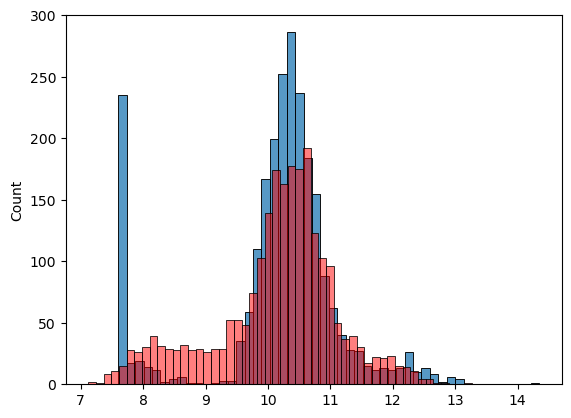

In [188]:
sns.histplot((y_val), bins=50)
sns.histplot((y_pred), color='red', bins=50, alpha=0.5)

Tuning the Model

In [189]:
for r in [0, 0.000001, 0.00001, 0.0001, 0.001, 0.01, 0.1, 1, 10]:

    X_train = prepare_x(df_train)

    X_val = prepare_x(df_val)

    w0, w = train_linear_regression_reg(X_train, y_train, r=r)

    y_pred = w0 + X_val.dot(w)

    score = rmse(y_val, y_pred)

    print(r, w0, score)
    

0 1.0988239383087294e+16 31.102518162913647
1e-06 46.18457838389436 0.4522280197680389
1e-05 9.263833450169736 0.45222796076114613
0.0001 6.330946383506262 0.4522280011755489
0.001 6.285522284126121 0.45222847238028474
0.01 6.276604369012285 0.4522332254401086
0.1 6.191208657252675 0.45228514154081706
1 5.634896667950106 0.45307961315602
10 4.283980108969658 0.4666891327181958


In [190]:
r = 0.00001

X_train = prepare_x(df_train)

X_val = prepare_x(df_val)

w0, w = train_linear_regression_reg(X_train, y_train, r=r)

y_pred = w0 + X_val.dot(w)

score = rmse(y_val, y_pred)

score

np.float64(0.45222796076114613)

Using the Model

In [191]:
df_full_train = pd.concat([df_train, df_val])

In [192]:
df_full_train = df_full_train.reset_index(drop=True)

In [193]:
df_full_train

,make,model,year,engine_fuel_type,engine_hp,engine_cylinders,transmission_type,driven_wheels,number_of_doors,market_category,vehicle_size,vehicle_style,highway_mpg,city_mpg,popularity,num_doors_2,num_doors_3,num_doors_4
0,chevrolet,cobalt,2008,regular_unleaded,148.0,4.0,manual,front_wheel_drive,2.0,NaN,compact,coupe,33,24,1385,1.0,0.0,0.0
1,toyota,matrix,2012,regular_unleaded,132.0,4.0,automatic,front_wheel_drive,4.0,hatchback,compact,4dr_hatchback,32,25,2031,0.0,0.0,1.0
2,subaru,impreza,2016,regular_unleaded,148.0,4.0,automatic,all_wheel_drive,4.0,hatchback,compact,4dr_hatchback,37,28,640,0.0,0.0,1.0
3,volkswagen,vanagon,1991,regular_unleaded,90.0,4.0,manual,rear_wheel_drive,3.0,NaN,large,passenger_minivan,18,16,873,0.0,1.0,0.0
4,ford,f-150,2017,flex-fuel_(unleaded/e85),385.0,8.0,automatic,four_wheel_drive,4.0,flex_fuel,large,crew_cab_pickup,21,15,5657,0.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9527,chevrolet,chevy_van,1998,regular_unleaded,200.0,6.0,automatic,rear_wheel_drive,3.0,NaN,midsize,cargo_van,18,13,1385,NaN,NaN,NaN
9528,subaru,xv_crosstrek,2014,regular_unleaded,160.0,4.0,automatic,all_wheel_drive,4.0,"crossover,hybrid",compact,4dr_suv,33,29,640,NaN,NaN,NaN
9529,dodge,magnum,2006,regular_unleaded,250.0,6.0,automatic,all_wheel_drive,4.0,NaN,large,wagon,22,15,1851,NaN,NaN,NaN
9530,honda,civic,2016,regular_unleaded,174.0,4.0,automatic,front_wheel_drive,4.0,NaN,midsize,sedan,42,31,2202,NaN,NaN,NaN


In [194]:
X_full_train = prepare_x(df_full_train)

In [195]:
X_full_train

array([[148.,   4.,  33., ...,   1.,   0.,   0.],
       [132.,   4.,  32., ...,   0.,   0.,   1.],
       [148.,   4.,  37., ...,   0.,   0.,   1.],
       ...,
       [250.,   6.,  22., ...,   0.,   0.,   0.],
       [174.,   4.,  42., ...,   0.,   0.,   0.],
       [256.,   6.,  27., ...,   0.,   0.,   0.]])

In [196]:
y_full_train = np.concatenate([y_train, y_val])

In [197]:
w0, w = train_linear_regression_reg(X_full_train, y_full_train, r=0.0001)

In [198]:
X_test = prepare_x(df_test)

y_pred = w0 + X_test.dot(w)

score = rmse(y_test, y_pred)

score

np.float64(0.4560717653073018)

<Axes: ylabel='Count'>

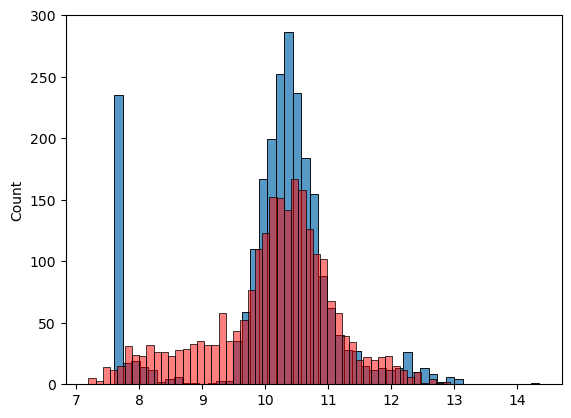

In [199]:
sns.histplot((y_val), bins=50)
sns.histplot((y_pred), color='red', bins=50, alpha=0.5)

In [ ]:
i = 340

car = df_test.iloc[i].to_dict()

df_small = pd.DataFrame([car])

x = prepare_x(df_small)

y = y_test[i]
    
y_pred = (w0 + x.dot(w))[0]

np.expm1(y), np.expm1(y_pred), rmse(y, y_pred)

(np.float64(39699.99999999998),
 np.float64(37820.332223033554),
 np.float64(0.04850308832503103))